### **Graduation Lab (Week 6)**

### Rachel Seo ydp7xv

Instructions:

Let's build a kNN model using the college completion data. 
The data is messy and you have a degrees of freedom problem, as in, we have too many features.  

You've done most of the hard work already, so you should be ready to move forward with building your model. 

### Data-Cleaning

Given by Prof. Brian

README for the dataset: https://data.world/databeats/college-completion/workspace/file?filename=README.txt

In [1]:
# import libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

In [2]:
import pandas as pd

grad_data = pd.read_csv('https://query.data.world/s/qpi2ltkz23yp2fcaz4jmlrskjx5qnp', encoding="cp1252")
# the encoding part here is important to properly read the data! It doesn't apply to ALL csv files read from the web,
# but it was necessary here.
grad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   unitid                                3798 non-null   int64  
 1   chronname                             3798 non-null   object 
 2   city                                  3798 non-null   object 
 3   state                                 3798 non-null   object 
 4   level                                 3798 non-null   object 
 5   control                               3798 non-null   object 
 6   basic                                 3798 non-null   object 
 7   hbcu                                  94 non-null     object 
 8   flagship                              50 non-null     object 
 9   long_x                                3798 non-null   float64
 10  lat_y                                 3798 non-null   float64
 11  site             

In [3]:
grad_data.shape

(3798, 62)

In [4]:
# drop missing values/not useful values

to_drop = list(range(39, 56))
to_drop.extend([27, 9, 10, 11, 28, 36, 60, 56])

grad_data1 = grad_data.drop(grad_data.columns[to_drop], axis=1)

In [5]:
# drop even more data that doesn't look predictive
drop_more = [0,1,2,3,6,8,11,12,14,15,18,21,23,29,32,33,34,35]
grad_data2 = grad_data1.drop(grad_data1.columns[drop_more], axis=1)
grad_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   level                 3798 non-null   object 
 1   control               3798 non-null   object 
 2   hbcu                  94 non-null     object 
 3   student_count         3798 non-null   int64  
 4   awards_per_value      3798 non-null   float64
 5   exp_award_value       3798 non-null   int64  
 6   exp_award_percentile  3798 non-null   int64  
 7   ft_pct                3794 non-null   float64
 8   fte_percentile        3798 non-null   int64  
 9   med_sat_value         1337 non-null   float64
 10  aid_value             3797 non-null   float64
 11  grad_100_value        3467 non-null   float64
 12  grad_100_percentile   3467 non-null   float64
 13  grad_150_value        3467 non-null   float64
 14  grad_150_percentile   3467 non-null   float64
 15  pell_value           

In [6]:
grad_data2.head()

,level,control,hbcu,student_count,awards_per_value,exp_award_value,exp_award_percentile,ft_pct,fte_percentile,med_sat_value,aid_value,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,retain_value,ft_fac_value,cohort_size
0,4-year,Public,X,4051,14.2,105331,90,93.8,33,823.0,7142.0,10.0,15.0,29.1,14.0,71.2,63.1,82.8,882.0
1,4-year,Public,NaN,11502,20.9,136546,97,72.7,67,1146.0,6088.0,29.4,67.0,53.5,66.0,35.1,80.2,92.4,1376.0
2,4-year,Private not-for-profit,NaN,322,29.9,58414,30,62.7,12,NaN,2540.0,0.0,0.0,66.7,72.0,68.4,37.5,67.2,3.0
3,4-year,Public,NaN,5696,20.9,64418,61,74.4,40,1180.0,6647.0,16.5,34.0,48.4,54.0,32.8,81.0,65.5,759.0
4,4-year,Public,X,5356,11.6,132407,96,91.0,41,830.0,7256.0,8.8,11.0,25.2,9.0,82.7,62.2,67.0,1351.0


In [7]:
grad_data2.replace('NULL', np.nan, inplace=True)

In [8]:
grad_data2['hbcu'] = [1 if grad_data2['hbcu'][i]=='X' else 0 for i in range(len(grad_data2['hbcu']))]
grad_data2['hbcu'].value_counts()

hbcu
0    3704
1      94
Name: count, dtype: int64

In [9]:
grad_data2['hbcu'] = grad_data2.hbcu.astype('category')

In [10]:
# convert more variables to factors
grad_data2[['level', 'control']] = grad_data2[['level', 'control']].astype('category')

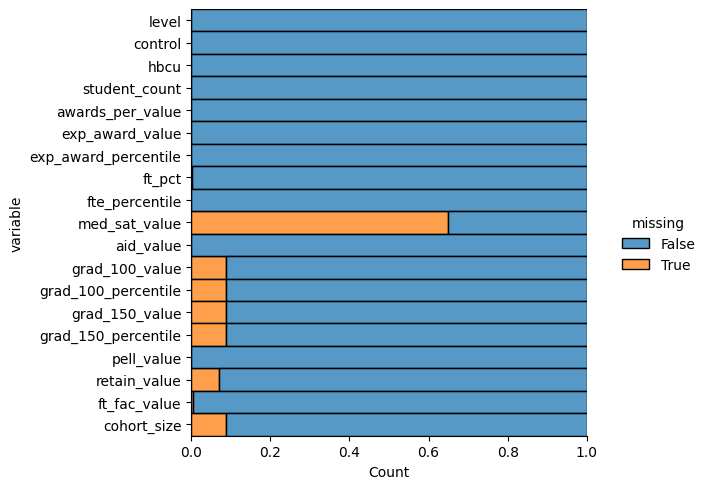

In [11]:
# check missing data
import seaborn as sns

sns.displot(
    data=grad_data2.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [12]:
# drop med_stat_value then delete the rest of the NA rows
grad_data2 = grad_data2.drop(grad_data[['med_sat_value']], axis=1)
grad_data2.dropna(axis = 0, how = 'any', inplace = True)

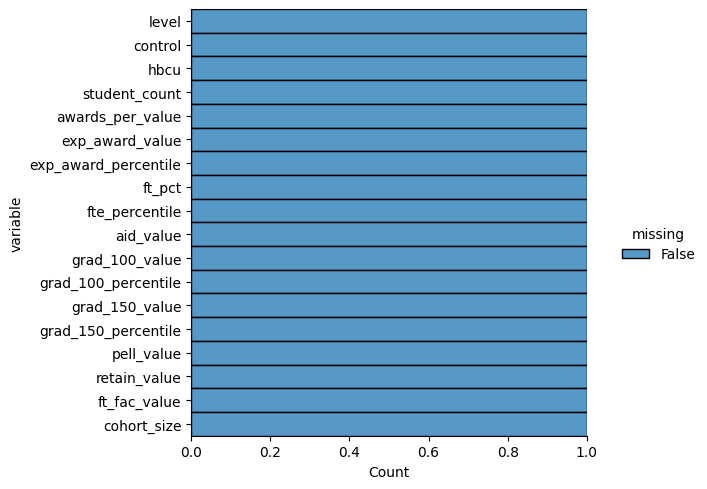

In [13]:
sns.displot(
    data=grad_data2.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
) 

In [14]:
int_cols = grad_data2.select_dtypes(include='int64').columns
print(int_cols)

Index(['student_count', 'exp_award_value', 'exp_award_percentile',
       'fte_percentile'],
      dtype='object')


In [15]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(grad_data2[int_cols])   # conduct data transformation
scaled_df = pd.DataFrame(d, columns=int_cols)   # convert back to pd df; transformation converts to array
grad_data2[int_cols] = scaled_df   # put data back into the main df

In [16]:
# all data is normalized!
grad_data2.describe() 

,student_count,awards_per_value,exp_award_value,exp_award_percentile,ft_pct,fte_percentile,aid_value,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,retain_value,ft_fac_value,cohort_size
count,3083.000000,3371.000000,3083.000000,3083.000000,3371.000000,3083.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000
mean,0.028538,22.710116,0.012989,0.521395,71.625185,0.516588,8355.173539,28.619371,47.126669,42.901187,49.303471,45.763364,66.699763,47.042539,675.608128
std,0.044812,10.040922,0.022193,0.286257,25.040679,0.288517,6661.113528,23.208964,30.373339,23.172944,29.245419,19.458833,15.995472,24.293820,969.258271
min,0.000000,0.500000,0.000000,0.000000,3.800000,0.000000,294.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.004594,17.100000,0.006494,0.280000,49.750000,0.270000,4074.500000,9.300000,20.000000,23.600000,24.000000,31.600000,56.400000,27.800000,146.000000
50%,0.012327,21.000000,0.010044,0.530000,78.600000,0.530000,5472.000000,23.100000,47.000000,41.700000,49.000000,43.100000,67.100000,44.000000,367.000000
75%,0.033902,25.300000,0.015248,0.770000,94.300000,0.770000,10533.000000,43.900000,73.000000,60.500000,75.000000,58.450000,78.100000,64.400000,802.000000
max,1.000000,131.100000,1.000000,1.000000,100.000000,1.000000,41580.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,16229.000000


In [17]:
cat_cols = grad_data2.select_dtypes(include='category').columns
print(cat_cols)

Index(['level', 'control', 'hbcu'], dtype='object')


In [18]:
encoded = pd.get_dummies(grad_data2[cat_cols])
encoded.head()

,level_2-year,level_4-year,control_Private for-profit,control_Private not-for-profit,control_Public,hbcu_0,hbcu_1
0,False,True,False,False,True,False,True
1,False,True,False,False,True,True,False
2,False,True,False,True,False,True,False
3,False,True,False,False,True,True,False
4,False,True,False,False,True,False,True


In [19]:
grad_data2 = grad_data2.drop(cat_cols, axis=1)
grad_data2 = grad_data2.join(encoded)
grad_data2.dropna()

grad_data2.head()

,student_count,awards_per_value,exp_award_value,exp_award_percentile,ft_pct,fte_percentile,aid_value,grad_100_value,grad_100_percentile,grad_150_value,...,retain_value,ft_fac_value,cohort_size,level_2-year,level_4-year,control_Private for-profit,control_Private not-for-profit,control_Public,hbcu_0,hbcu_1
0,0.023677,14.2,0.019941,0.90,93.8,0.33,7142.0,10.0,15.0,29.1,...,63.1,82.8,882.0,False,True,False,False,True,False,True
1,0.067476,20.9,0.025851,0.97,72.7,0.67,6088.0,29.4,67.0,53.5,...,80.2,92.4,1376.0,False,True,False,False,True,True,False
2,0.001758,29.9,0.011059,0.30,62.7,0.12,2540.0,0.0,0.0,66.7,...,37.5,67.2,3.0,False,True,False,True,False,True,False
3,0.033347,20.9,0.012196,0.61,74.4,0.40,6647.0,16.5,34.0,48.4,...,81.0,65.5,759.0,False,True,False,False,True,True,False
4,0.031348,11.6,0.025067,0.96,91.0,0.41,7256.0,8.8,11.0,25.2,...,62.2,67.0,1351.0,False,True,False,False,True,False,True


In [20]:
grad_data2['retain_value'].describe()
# high retain value means upper threshold - 78.10

count    3371.000000
mean       66.699763
std        15.995472
min         0.000000
25%        56.400000
50%        67.100000
75%        78.100000
max       100.000000
Name: retain_value, dtype: float64

In [21]:
# adding as retain_value as predictor 

grad_data2['retain value_p'] = pd.cut(grad_data2.retain_value, bins = [-1,78,100], labels =[0,1]) # distribution properties; start, cut, stop

grad_data2.head() # new column retain_value_p is now binary based on if the continuous value is above 0.78 or not

,student_count,awards_per_value,exp_award_value,exp_award_percentile,ft_pct,fte_percentile,aid_value,grad_100_value,grad_100_percentile,grad_150_value,...,ft_fac_value,cohort_size,level_2-year,level_4-year,control_Private for-profit,control_Private not-for-profit,control_Public,hbcu_0,hbcu_1,retain value_p
0,0.023677,14.2,0.019941,0.90,93.8,0.33,7142.0,10.0,15.0,29.1,...,82.8,882.0,False,True,False,False,True,False,True,0
1,0.067476,20.9,0.025851,0.97,72.7,0.67,6088.0,29.4,67.0,53.5,...,92.4,1376.0,False,True,False,False,True,True,False,1
2,0.001758,29.9,0.011059,0.30,62.7,0.12,2540.0,0.0,0.0,66.7,...,67.2,3.0,False,True,False,True,False,True,False,0
3,0.033347,20.9,0.012196,0.61,74.4,0.40,6647.0,16.5,34.0,48.4,...,65.5,759.0,False,True,False,False,True,True,False,1
4,0.031348,11.6,0.025067,0.96,91.0,0.41,7256.0,8.8,11.0,25.2,...,67.0,1351.0,False,True,False,False,True,False,True,0


1. Use the question/target variable you submitted and 
build a model to answer the question you created for this dataset. 


**Question:** Can we predict high college completion rates? - Assuming that higher ratings results in an **increase in university profit**, can we predict the likelihood of a student completing all 4 years at an institution at a certain threshold?

2. Build and optimize a kNN model to predict your target variable using 3 nearest neighbors. Make sure it is a classification problem,
meaning if needed change the target variable.

In [22]:
# prevalence of target variable
grad_data2['retain value_p'].value_counts()[1] / grad_data2['retain value_p'].count()

# there is a 25% chance of picking a college with a high retain value

np.float64(0.25185404924354793)

In [23]:
# train and test split 
train, test = train_test_split(grad_data2, test_size=0.4, stratify = grad_data2['retain value_p'])
test, val = train_test_split(test, test_size=0.5, stratify=test['retain value_p'])

In [24]:
import random
from sklearn.impute import SimpleImputer

random.seed(1984)   # kNN is a random algorithm, so we use `random.seed(x)` to make results repeatable

X_train = train.drop(['retain value_p'], axis=1).values
y_train = train['retain value_p'].values

# missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

neigh = KNeighborsClassifier(n_neighbors=3) # 3 nearest neighbors
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
# check the model's accuracy on the test data:

X_test = test.drop(['retain value_p'], axis=1).values
y_test = test['retain value_p'].values

# missing values
X_test = imputer.transform(X_test)

neigh.score(X_test, y_test)

0.7997032640949555

In [26]:
# test the accuracy on our validation data

X_val = val.drop(['retain value_p'], axis=1).values
y_val = val['retain value_p'].values

# missing values 
X_val = imputer.transform(X_val)

neigh.score(X_val, y_val)

0.8074074074074075

3. Create a dataframe that includes the test target values, test predicted values, 
and test probabilities of the positive class.

In [27]:
# probability, expected, and actual values
test_probs = neigh.predict_proba(X_test)[:,1] # probabilities of the positive class
test_preds = neigh.predict(X_test)

# convert probabilities to pd df
final_model = pd.DataFrame({
    'test_target': y_test.astype(int).tolist(),
    'predicted_values': test_preds.astype(int).tolist(),
    'pos_prob': test_probs.tolist()
})
final_model

,test_target,predicted_values,pos_prob
0,0,1,1.000000
1,0,0,0.000000
2,1,0,0.000000
3,0,0,0.000000
4,1,0,0.333333
...,...,...,...
669,1,0,0.333333
670,0,1,0.666667
671,0,1,0.666667
672,1,0,0.000000


In [28]:
# convert classes to categories
final_model.test_target = final_model.test_target.astype('category')
final_model.predicted_values = final_model.predicted_values.astype('category')

In [29]:
final_model.pos_prob.value_counts()

pos_prob
0.000000    377
0.333333    140
0.666667     92
1.000000     65
Name: count, dtype: int64

4. Use the above dataframe to experiment with the threshold function. What happens at higher 
and lower thresholds when looking at the confusion matrix? Document what you see in comments.

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def adjust_thres(x, y, z):
    """
    x=pred_probabilities
    y=threshold
    z=tune_outcome
    """
    thres = pd.DataFrame({'new_preds': [1 if i > y else 0 for i in x]})
    thres.new_preds = thres.new_preds.astype('category')
    con_mat = confusion_matrix(z, thres)  
    print(con_mat)

In [33]:
adjust_thres(final_model.pos_prob, .90, final_model.test_target)   
# At a higher threshold, the amount of true positives decrease. 

[[491  13]
 [118  52]]


In [34]:
adjust_thres(final_model.pos_prob, .1, final_model.test_target) 
# At a lower threshold, the amount of true positives increase.

[[343 161]
 [ 34 136]]


5. No code question: If you adjusted the k hyperparameter what do you think would
happen to the threshold function? Would the confusion look the same at the same threshold 
levels or not? Why or why not?

If I increased the `k` hyperparameter, I think the impact of threshold tuning would decrease because there are more neighbors to consider and fewer values are near extreme values of 0 or 1. The confusion would not look the same at the same threshold level because a higher `k` means values are more likely to be closer to 0.5, meaning smoother, more generalized predictions.

6. Evaluate the results using the confusion matrix (at the default threshold). 
Then talk through your question, summarize what 
concerns or positive elements do you have about the model?

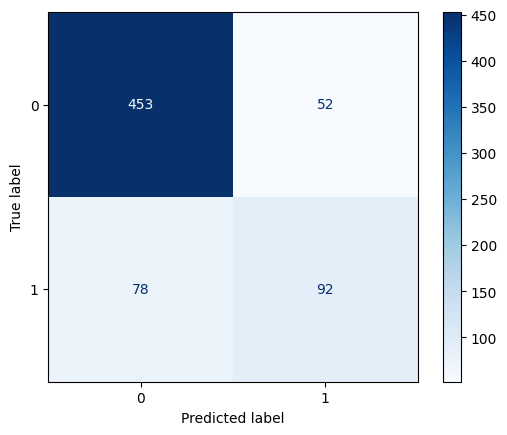

In [35]:
# create confusion matrix

ConfusionMatrixDisplay.from_estimator(neigh, X_val, y_val, cmap='Blues')
plt.show()

**Question:** Can we predict high college completion rates? In this case, "high" college completion rates were defined as being greater than or equal to the Q3 of the `retain_value` column. The 75% summary statistic of  `retain_value` landed at 78.10. 

**Concerns with Model:** At the default threshold, the confusion matrix predicts 93 false positives and 52 false negatives. The amount of false positives being greater than the amount of true positives is a bit concerning; false positives generally being a cause for concern because the model is falsely evaluating a college to have a high `retain_value` when it actually doesn't. There 

**Positive Elements:** At the default threshold, the confusion matrix accurately predicts a great number of true negatives. It also manages to predict 77 true positives as well.

7. Clean up your code such that you have 2 functions. One the cleans the data & splits into training / test and one that allows you to train and test the model with different k and threshold values. Make sure not to use variable names in the functions, you want the functions to be usable in different scenarios (see question 9). 

**Data Cleaning and Splitting Function**

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def clean_and_split(url, target_var, test_size=0.4, val_size=0.5):
    # data
    grad_data = pd.read_csv(url, encoding="cp1252")
    
    # dropping unnecessary columns
    to_drop = list(range(39, 56)) + [27, 9, 10, 11, 28, 36, 60, 56]
    grad_data1 = grad_data.drop(grad_data.columns[to_drop], axis=1)
    
    drop_more = [0,1,2,3,6,8,11,12,14,15,18,21,23,29,32,33,34,35]
    grad_data2 = grad_data1.drop(grad_data1.columns[drop_more], axis=1)
    
    # replacing null values
    grad_data2.replace('NULL', np.nan, inplace=True)
    
    # 'hbcu' column to binary
    grad_data2['hbcu'] = grad_data2['hbcu'].apply(lambda x: 1 if x == 'X' else 0).astype('category')
    
    # convert categorical variables
    grad_data2[['level', 'control']] = grad_data2[['level', 'control']].astype('category')
    
    # drop 'med_sat_value' and remaining NA rows
    grad_data2.drop(columns=['med_sat_value'], inplace=True, errors='ignore')
    grad_data2.dropna(inplace=True)
    
    # normalize integer columns
    int_cols = grad_data2.select_dtypes(include='int64').columns
    scaler = MinMaxScaler()
    grad_data2[int_cols] = scaler.fit_transform(grad_data2[int_cols])
    
    # one-hot encode categorical variables
    cat_cols = grad_data2.select_dtypes(include='category').columns
    encoded = pd.get_dummies(grad_data2[cat_cols])
    grad_data2 = grad_data2.drop(columns=cat_cols).join(encoded)

    # add retain value as a predictor
    grad_data2['retain value_p'] = pd.cut(grad_data2.retain_value, bins = [-1,78,100], labels =[0,1]) # distribution properties; start, cut, stop
    
    # split data into train, test, and validation sets
    train, test = train_test_split(grad_data2, test_size=test_size, stratify=grad_data2[target_var])
    test, val = train_test_split(test, test_size=val_size, stratify=test[target_var])
    
    return train, test, val


In [37]:
# example
url = 'https://query.data.world/s/qpi2ltkz23yp2fcaz4jmlrskjx5qnp'
target_var = 'retain value_p'
train_data, test_data, val_data = clean_and_split(url, target_var)

**Training and Testing Model Function**

In [38]:
def train_and_test(train, test, val, target_var, n, threshold):
    random.seed(1984)
    X_train = train.drop([target_var], axis=1).values
    y_train = train[target_var].values

    # handle missing values
    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(X_train)

    # KNN model
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X_train, y_train)

    # evaluate model on test data
    X_test = test.drop([target_var], axis=1).values
    y_test = test[target_var].values
    X_test = imputer.transform(X_test)

    test_accuracy = neigh.score(X_test, y_test)

    # on validation data
    X_val = val.drop([target_var], axis=1).values
    y_val = val[target_var].values
    X_val = imputer.transform(X_val)

    val_accuracy = neigh.score(X_val, y_val)

    # probabilities and predictions for test data
    test_probs = neigh.predict_proba(X_test)[:,1]  # Probabilities of the positive class
    test_preds = neigh.predict(X_test)

    # adjusting threshold and calculate confusion matrix
    def adjust_thres(probs, threshold, true_labels):
        preds_adjusted = [1 if prob > threshold else 0 for prob in probs]
        con_mat = confusion_matrix(true_labels, preds_adjusted)
        print("Confusion Matrix:\n", con_mat)

        # convert to dataframe
        final_model = pd.DataFrame({
            'test_target': true_labels.astype(int).tolist(),
            'predicted_values': preds_adjusted,
            'pos_prob': probs.tolist()
        })
        
        # convert classes to categories
        final_model['test_target'] = final_model['test_target'].astype('category')
        final_model['predicted_values'] = final_model['predicted_values'].astype('category')
        
        return final_model
    final_results = adjust_thres(test_probs, threshold=threshold, true_labels=y_test)
    return test_accuracy, val_accuracy

In [39]:
# example
train = train_data
test = test_data 
val = val_data 
target_var = 'retain value_p'
n = 10
threshold = 0.5

train_and_test(train, test, val, target_var, n, threshold)

Confusion Matrix:
 [[487  17]
 [114  56]]


(0.8056379821958457, 0.8133333333333334)

8. How well does the model perform? Did the adjustments of the threshold and k values help the model? Why or why not?

The model performs mediocrely. When I lowered the threshold from 0.5 to 0.3, model test accuracy and validation data did not change, but the confusion matrix showed more true positives and false negatives and less true positives and false positives. When I increased the threshold from 0.5 to 0.7, 
model accuracy did not change, but the confusion matrix showed more true negatives and false positives and less true positives and false negatives. When I increased the k value from 3 to 6, model accuracy increased and so did the number of true positives and negatives. When I increased the k value from 3 to 6 to 10, model accuracy decreased and so did the number of true negatives, while the number of true positives increased. 

The adjustments of the threshold and k values to help the model up until a certain point.

9. Choose another variable as the target in the dataset and create another kNN model using the two functions you created in
step 7. 

In [40]:
# for variable `control_Public` 

# clean and split
url = 'https://query.data.world/s/qpi2ltkz23yp2fcaz4jmlrskjx5qnp'
target_var = 'control_Public'
train_data1, test_data1, val_data1 = clean_and_split(url, target_var)

# train and test
train = train_data1
test = test_data1
val = val_data1
target_var = 'control_Public'
n = 5
threshold = 0.5

train_and_test(train, test, val, target_var, n, threshold)

Confusion Matrix:
 [[327  48]
 [ 38 261]]


(0.8724035608308606, 0.8666666666666667)